<a href="https://colab.research.google.com/github/msrcoarreola/MachineLearning2/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Import libraries

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

## Import data

In [ ]:
# Get dataset
df_sal = pd.read_csv('Position_Salaries.csv')
df_sal.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Analyze data

### Describe

In [ ]:
# Describe data
df_sal.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


### Distribution

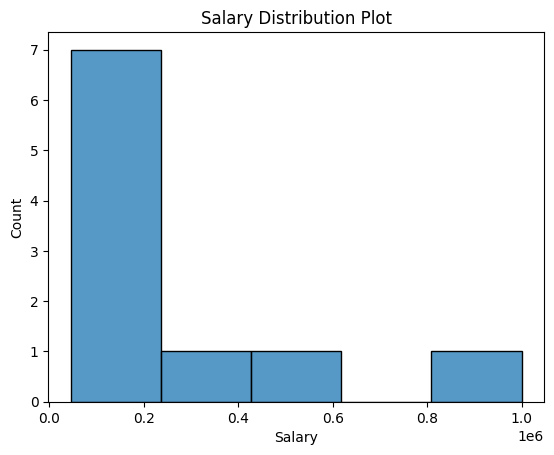

In [ ]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.histplot(df_sal['Salary'])
plt.show()

### Relation between salary and level

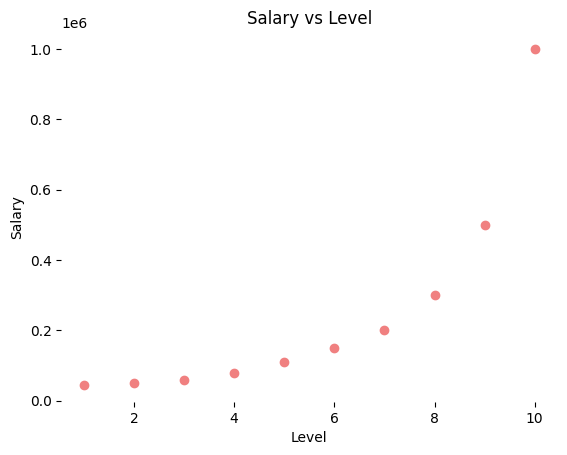

In [ ]:
# Relationship between Salary and Level
plt.scatter(df_sal['Level'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

## Split data into Independetn/Dependent variables

In [ ]:
# Splitting variables
X = df_sal.iloc[:, 1:-1].values   # independent
y = df_sal.iloc[:, -1].values     # dependent

## Train model

### Linear Regression

In [ ]:
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

### Polynomial regression

In [ ]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 3)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

LinearRegression()

## Predict results

In [ ]:
# Predict results
y_pred_lr = lr.predict(X)           # Linear Regression
y_pred_poly = lr_2.predict(X_poly)  # Polynomial Regression

## Visualize predictions

### Prediction with linear regression

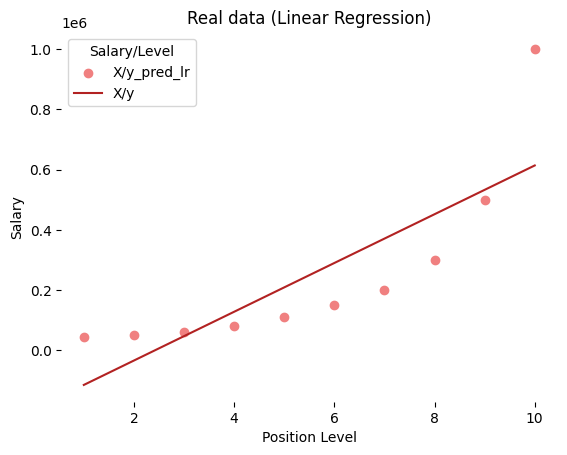

In [ ]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

### Prediction whith polynomial regression

/tmp/ipython-input-1931787223.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


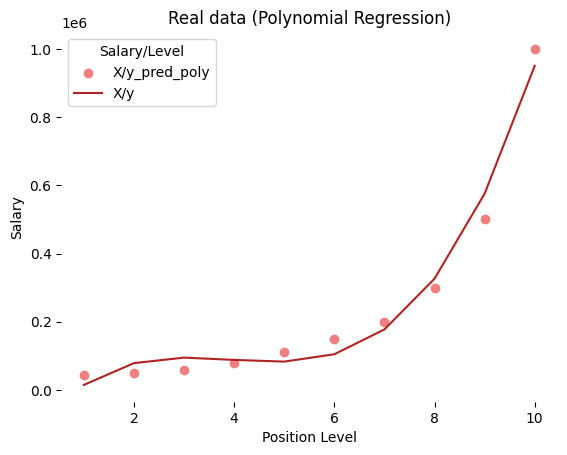

In [ ]:
# Visualize real data with polynomial regression
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

## Text with an example

In [ ]:
# Predict a new result with linear regression
print(f'Linear Regression result : {lr.predict([[6.5]])}')

# Predict a new result with polynomial regression
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[6.5]]))}')

Linear Regression result : [330378.78787879]
Polynomial Regression result : [133259.46969697]
